# Python(3) dans le désordre

Dans ce document, les exemples (préfixés par `In[]`) sont tous modifiables et leur résultat visible en cliquant sur le bouton **Run**.
N'hésitez pas à modifier, jouer et expérimenter dans ce bac à sable, au fil de votre lecture.

Python est un langage facile à apprendre seulement parce qu'il permet justement d'écrire, tester, se tromper et reprendre facilement. N'hésitez pas à commencer par de tout petits bouts de code pour bien comprendre, laissez vous guider par les erreurs que vous pourriez lire (le vocabulaire présenté ici vous aidera à les décortiquer).

Et n'oubliez jamais de décomposer chacune des expressions qui vous posent problème. Même les lignes les plus complexes ne sont que l'assemblage d'éléments plus simples qu'il ne faut pas hésiter à éclaircir point par point, en gardant en tête les notions vues concernant les types, les qualificatifs et les propriétés.

La documentation est complète, n'hésitez pas à la consulter ! Vous trouverez de nombreux lien directs en cliquant sur les symboles de lien [🔗](https://docs.python.org/3.7)

## Installer et lancer python

### Sous linux en général et ubuntu en particulier

Il n'y a rien a faire, python3 devrait être installé par défaut. Pour le vérifier, lancer la commande `python3 --version` dans un terminal, la réponse devrait ressembler à `Python 3.6.7` (le numéro de version peut être différent).

Sinon, il est aisé de l'installer en lançant une commande `sudo apt install python3`

Par convention, sous les systèmes posix, tout fichier commençant par `#!/usr/bin/env python3` (le `#` doit bien être le premier caractère du fichier) et étant _éxecutable_ peut être lancé comme un programme.

Sous votre éditeur de texte préféré, avec vos petits doigts boudins, tapez le texte suivant :
```
#!/usr/bin/env python3

print("Your mother was a hamster and your father smelt of elderberries!")
```

Sauvegarder sous un nom qui vous sied et qui termine par `.py` (ou pas), quitter et, au choix :

1. lancer la commande suivante `chmod +x citation.py` (pour le rendre exécutable), puis `./citation.py`
2. ou utilisez l'interpréteur en lançant `python3 citation.py`

### Sous windows

Je recommande d'installer la solution complète fournie par [Anaconda](https://www.anaconda.com/download/#windows) et d'utiliser Spyder, l'éditeur fourni, pour commencer.

Il offre une interface proche de celle de matlab, avec un côté « tout-en-un » très rassurant pour les premiers pas.

## À quoi ça ressemble

La première particularité de python, c'est que la structure du code est déterminée par l'indentation.

* Un sous bloc commence toujours par :
    1. deux points
    2. un retour à la ligne
    3. suivi d'un niveau d'indentation supplémentaire.
* Il se termine lorsque le niveau d'indentation revient au niveau précédent

Voici un exemple simple, suivit ce que produit son exécution :

In [1]:
for i in range(4) :
    print(i, "est un chiffre", end=' ')
    if (i % 2) == 0 :
        print("pair")
    else :
        print("impair")
print("voilà, tu mourras moins bête")

0 est un chiffre pair
1 est un chiffre impair
2 est un chiffre pair
3 est un chiffre impair
voilà, tu mourras moins bête


> Soyez vigilant et réglez votre éditeur ! Quel que soit votre choix pour le marqueur d'indentation (quatre espaces ou une tabulation) il doit être cohérent sur tout le fichier.

> Pour autant, tout n'est pas obligé de tenir sur une seule ligne, les symboles ouvrants et fermants permettent d'écrire des expressions complexes sur plusieurs lignes. L'indentation à l'intérieur importe peu

In [2]:
u = (
    1 + 2 + 3 *
    4 + 5 + 6
)
u

26

> La documentation du langage et de l'ensembles des librairies inclues par défaut est complète, claire et précise. N'hésitez pas à vous y référer

## Les types

Le python permet de manipuler toutes sortes de trucs, pour ne pas les appeler _truc_, nous les appellerons _objets_. Et on appellera le type de ces objets : le type.

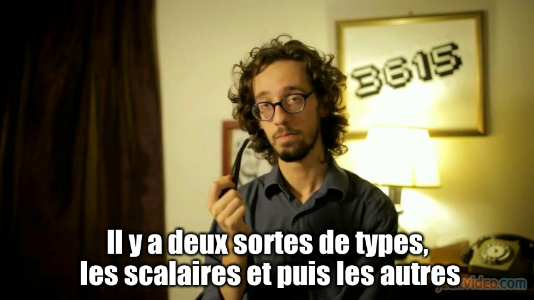

### Les scalaires

#### Le gros nul

`None`, pour les trucs vides

#### Les deux booléens

`True` et `False`, pour _pas faux_ et _faux_ respectivement. Leur arithmétique associée utilise les mots clefs `and`, `or` et `not` en toutes lettres [🔗](https://docs.python.org/3/library/stdtypes.html#boolean-operations-and-or-not)

In [73]:
False or not True

False

#### Les numériques

[doc](https://docs.python.org/3.7/library/stdtypes.html#numeric-types-int-float-complex)

##### entiers

Ils permettent de représenter tous les nombres de $\mathbb{Z}$, sans limite taille.

In [4]:
3**456

36922589523355488684862534309606828646354858539339639340108704606860278316954612223011926714496786380566924041472156813147058283837186067759425594341390772627248925636473894065900906894946778020270362243511617241359521

#### réels

Implémentés comme des `double`, suivant les conventions usuelles de C et suivant la norme [usuelle](https://en.wikipedia.org/wiki/IEEE_754) : 64 bits dont 11 pour l'exposant et le reste pour la mantisse

In [5]:
5.0e-1 * 3.14159

1.570795

#### et aussi...

On peut utiliser des nombres complexes ainsi que quelques types spéciaux (fractions, decimal, date et heure, etc. cf. documentation)

In [6]:
1.0 + 2.0j

(1+2j)

#### Quelques opérateurs arithmétiques

 operateur | effet
-----------|-------
`+` et `-` | addition et soustraction
`*` et `**` | multiplication et mise à la puissance (entière ou non)
`/` et `//` | division classique (retourne un réel) et division entière (euclidienne)
`&`, `\|`, `~` et `^` | fonctions _and_, _or_, _not_ et _xor_ appliquées bit à bit

> N'oubliez pas les parenthèses ! Même si la priorité définie des opérateurs ne présente pas de surprise particulières.

### Chaînes et tableaux

Alors que la plupart des languages ne font pas de distinction, ici deux objets différents cohabitent.

#### les chaînes de caractère [🔗](https://docs.python.org/3.7/library/stdtypes.html#text-sequence-type-str)

Pour du texte : `"Bonjour Moémi ! お元気ですか？"`.

Celle-ci étant prise dans un format dans lequel tous les caractères définis par la norme unicode sont valides, couvrant quasiment tous les langages connus (modernes ou anciens) : français, chinois, tibétain, grec, cunéiforme, etc.
Chaque élément est un caractère, même si le dit caractère est représenté par plusieurs octets.

#### les tableaux d'octets [🔗](https://docs.python.org/3.7/library/stdtypes.html#binary-sequence-types-bytes-bytearray-memoryview)

Pour des données binaires en vrac : `b'mais pas que \xf0\x9f\x98\x85'`.

Cet objet correspond plus à l'idée de la chaîne de caractère telle qu'on la retrouve en C. Il n'y a d'ailleurs pas de différence avec la forme précédente tant que tous les caractères utilisés sont valides en ASCII. Chaque élément prend exactement un octet.

#### conversion de l'un à l'autre

Avant tout, il faut avoir connaissance de l'encodage utilisé ou désiré, cet encodage doit être dans la [liste](https://docs.python.org/3/library/codecs.html#standard-encodings) suivante.

On _décode_ une chaîne d'octets pour avoir une chaîne de caractères et on _encode_ une chaîne de caractères en un tableau d'octets. Sachant que la plupart des encodages ne sont valides que pour un sous ensemble de l'unicode, l'opération est souvent périeuse.

In [7]:
b'mais pas que \xf0\x9f\x98\x85'.decode("utf8")

'mais pas que 😅'

### Les conteneurs

On trouve tout un ensemble d'objets qui permettent de stocker d'autres objets, peu importe leur nature ou leur nombre.

* la *liste*, un ensemble ordonné d'éléments : `[1, 2, 3, True, "Bidule", [4, 5, 6]]`
* le *tuple*, presque pareil : `(1, 2, 3, True, "Bidule", [4, 5, 6])`
* le *dictionnaire*, un tableau associatif clé → valeur : `{1:"Machin", 2:"Truc", "Bidule": [4, 5, 6]}`
* l'*ensemble*, une collection d'éléments uniques qui permet les opérations mathématiques usuelles sur les ensembles (union, intersection, etc.)

 conteneur | constructeur | syntaxe litérale
-----------|--------------|------------------
chaîne de caractère | str() | `"un"` ou `'deux'`
tableaux d'octets | bytes() | `b"un"` ou `b'deux'`
liste | list() | `[1, 2, 3]`
tuple | tuple() | `(1, 2, 3)`
dictionnaire | dict() | `{1:"un", 2:"deux", 3:"trois"}`
ensemble | set() | `{1, 2, 3}`

Et si ça ne suffit pas, il y en a d'autres, inventés pour autant de besoins particuliers (cf. le paquet `collections`). Et enfin, si ce n'est toujours pas assez, il est aisé d'en créer de nouveaux, [sur mesure](https://docs.python.org/3/reference/datamodel.html#emulating-container-types).

### Accès par Indice

#### par élément

Pour les listes, les tuples et les chaînes de caractères (en fait, tous les objets de la famille des _séquences_) il est possible de n'accéder qu'à une sous partie de l'élément via un mécanisme appelé _slice_.

In [21]:
# création d'une chaîne de caractères de 16 éléments
u = 'ABCDEFGHIJKLMNOP'
# accès à l'élément numéro 3
u[3]

'D'

La logique des slices est celle des piquets et des barrières. Les indices sont les numéros des piquets, les valeurs contenues dans les cellules sont l'équivalent des barrières. Ces indices étant des entiers relatifs.

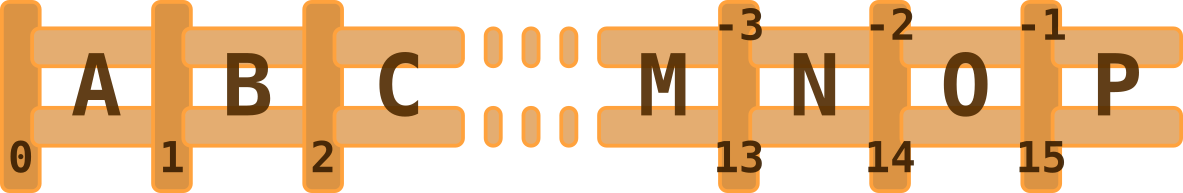

Le premier piquet est numéroté `0` et l'avant dernier peut également être numéroté `-1` (les nombres négatifs représentant les piquets en partant de la fin).
La case retournée, lors de l'accès à une case unique, est celle de la barrière juste à droite du piquet.

In [26]:
u[0], u[1], u[2]

('A', 'B', 'C')

In [25]:
u[13], u[14], u[15]

('N', 'O', 'P')

In [27]:
u[-3], u[-2], u[-1]

('N', 'O', 'P')

#### Par intervalle

Il est également possible de sélectionner des plages entières avec la syntaxe `start:stop`.

In [12]:
u[3:7]

'DEFG'

L'avantage de cette syntaxe, est que les intervalles contigüs utilisent la même borne : la borne de fin du premier intervalle, est la bonne de début du deuxième. Et que le nombre d'élément extrait est égale à la borne `stop` moins la borne `start`

In [13]:
u[2:8] # 6 élement extraits

'CDEFGH'

In [30]:
u[8:14] # I est la lettre suivant H

'IJKLMN'

S'il le besoin se fait de vouloir d'accéder à un intervalle semi ouvert (qui n'est pas borné d'un côté), il faut utiliser le mot clef `None` ou ne rien mettre

In [29]:
u[None:8], u[8:]

('ABCDEFGH', 'IJKLMNOP')

### Accès par clé

Dans le cas des dictionnaires, aussi appelés tableaux associatifs, l'accès par clé utilise la même syntaxe que pour l'accès par élément des séquences : `[]`

In [42]:
farm = {
    'vache' : "meuuh",    
    'canard' : "coin coin",
    'cochon' : "gruick gruick"
}

farm['canard']

'coin coin'

L'accès par intervalle n'ayant évidemment pas de sens puisque les clés ne sont pas ordonnées

## Qualificatifs

Dans ce language, tout objet (ie. tout ce qui peut se mettre dans une variable) possède des qualificatifs particuliers qui ont une influence sur la façon dont ils intéragissent avec le reste du code.

### Mutable

Certains objets sont dits `mutable` (l'inverse étant `immutable`) lorsqu'ils peuvent être modifiés après avoir été créés. Les listes et les dictionnaires portent ce qualificatif.

In [33]:
# on crée une liste de quelques éléments
u = [0, 1, 2]
# on modifie sur place l'élément 1
u[1] = 7
u

[0, 7, 2]

Lorsqu'il est mutable, un objet est en fait instancié une seule fois, chaque variable n'étant qu'un alias vers cette instance.

In [34]:
v = u # un nouvel alias v est créé
v[1] = 5 # en modifiant v, on modifie aussi u
u

[0, 5, 2]

Enfin tout se passe comme si l'objet était passé _par référence_, lors de l'appel de fonctions, suivant le vocable usuel du langage C.

In [36]:
def modify_lst(p) :
    p[1] = 9
    
modify_lst(u) # lors de l'appel de la fonction on modifie la liste passée
u

[0, 9, 2]

 objet | constructeur | mutable
-----------|--------------|------------------
scalaire | `int()`, `float()`, etc. | Non
chaîne de caractère | `str()` | Non
tableaux d'octets | `bytes()` | Non
liste | `list()` | Oui
tuple | `tuple()` | Non
dictionnaire | `dict()` | Oui
ensemble | `set()` | Oui

### Hashable

Pour faire vite, le qualificatif _hashable_ va être requis pour tout object qui sera utilisé comme un clé d'un tableau associatif. En général un object immutable est aussi hashable

 objet | constructeur | hashable
-----------|--------------|------------------
scalaire | `int()`, `float()`, etc. | Oui
chaîne de caractère | `str()` | Oui
tableaux d'octets | `bytes()` | Oui
liste | `list()` | Non
tuple | `tuple()` | Oui, mais...
dictionnaire | `dict()` | Non
ensemble | `set()` | Non

La condition pour qu'un `tuple` soit hashable est que tous ses sous éléments le soient également, et réccursivement...

## Propriétés

Ce langage suit la philosophie dite du `duck typing`.

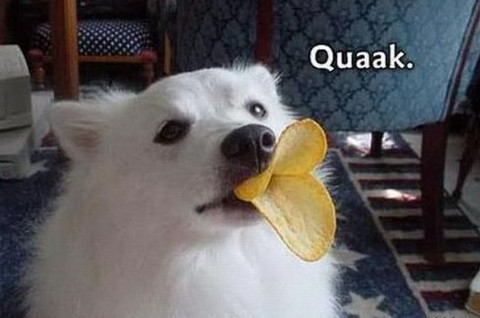

> Si ça fait _coin-coin_ comme un canard et que ça se dandine comme un canard alors c'est un canard

Ce qui compte, pour chaque usage, ce sont les propriétés de l'objet. Il est donc intéressant de voir quelques-unes de ces propriétés remarquables. Et, on le verra ultérieurement, chaque propriété est en fait émulable, et des objets fait maison peuvent se faire passer pour d'autres en quelques lignes de code, cf. [doc](https://docs.python.org/3/reference/datamodel.html#emulating-container-types)

> On ne dit pas : « est ce que cet objet est … » mais plutôt : « est ce que cet objet peut se comporter comme … »

Nous verrons que chaque propriété correspond à une méthode (une fonction particulière ratachée à une classe cf. plus bas). Si le code de cette méthode est rajouté, alors l'objet possède la-dite propriété. On appelle ça une méthode magique.

### _Iterable_

Un objet ayant cette propriété est le candidat idéal pour une boucle `for` (cf. les structures de contrôle). Sur un tel objet, il va être possible d'itérer sur l'ensemble des ses éléments, une fois chaque et dans l'ordre si l'objet est ordonné. La liste est un objet _iterable_.

In [47]:
for m in ['lun', 'mar', 'mercre', 'jeu', 'vendre'] :
    # m prends successivement l'une des valeurs de la liste
    print(m + '.di')

lun.di
mar.di
mercre.di
jeu.di
vendre.di


Le dictionnaire est _iterable_ également mais sans ordre garanti et l'itération se fait sur les clés.

In [44]:
for k in farm :
    # k prends successivement les valeurs "vache", "canard" puis "cochon" à chaque itération
    print("le {0} fait {1}".format(k, farm[k]))

le vache fait meuuh
le canard fait coin coin
le cochon fait gruick gruick


Le résultat de la fonction `range()` est également iterable.

In [40]:
for i in range(4) :
    print(i)

0
1
2
3


La méthode magique est [`__iter__`](https://docs.python.org/3/reference/datamodel.html#object.__iter__)

### _Subscriptable_

Tout objet qui accepte la syntaxe `[]` est _subscriptable_ : listes, tuples, dictionnaires, etc.

In [46]:
4['bah non'] # un nombre entier, comme 4, n'est pas subscriptable

TypeError: 'int' object is not subscriptable

Les deux méthodes magiques sont [`__setitem__`](https://docs.python.org/3/reference/datamodel.html#object.__setitem__) et [`__getitem__`](https://docs.python.org/3/reference/datamodel.html#object.__getitem__)

## Signe égal

Un petit mot ici sur les affectations, elles possèdent des variations qui valent le coup d'y consacrer un instant.

Sous leur forme classique, il n'y a pas de surprise

In [57]:
a = 7 # affecte l'entier 7 à la variable a
a = a + 2 # affecte à a la valeur de a + 2
a

9

Mais l'affectation se comprend également dans un sens plus large. Avec un plus grand nombre d'éléments, les affectations se font au mieux, chaque variable étant affectée dans l'ordre. On peut donc sans peine, échanger les valeurs de a et b de la façon suivante.

In [61]:
a, b = 3, 6 # affectation multiple
print("a={0}, b={1}".format(a, b))
a, b = b, a # échange de a et de b
print("a={0}, b={1}".format(a, b))

a=3, b=6
a=6, b=3


Cette écriture possède une plus grande richesse encore, que nous verrons plus tard. Mais elle est déjà très utile pour récupérer de multiples resultats qu'une fonction pourrait retourner.

## Les structures de contrôle

Voyons ici quelques moyens simple d'organiser le code

### La branch conditionnelle `if-then-else`

Cette structure, basée sur les mots clé `if` et `else` permet de choisir d'exécuter un bout de code ou un autre suivant une condition.

In [56]:
age = 21
if age < 18 :
    # code actif seulement si age < 18
    print("passe ton bac d'abord")
else :
    # code actif sinon
    print("tu veux monter chéri ?")

tu veux monter chéri ?


Voici un résumé des expressions utiles afin de composer des conditions plus ou moins complexes

 operateur | détail
-----------|--------
`and`, `or` et `not` | les operateurs logiques usuels
`<`, `>`, `<=`, `>=`, `!=` et `==` | les opérateur de comparaison, stricte, ou pas, de différence et d'égalité
`in` | pour savoir si un élément est présent dans une liste ou si une clé est présente dans un dictionnaire
`is` | l'opérateur à utiliser pour tester les trois objets spéciaux suivant : `True`, `False`, `None`

**Astuce 😉** En python, il est possible d'enchaîner les opérateurs de comparaison, comme on le ferait en math.

In [74]:
i = 14
if 10 <= i < 20 :
    print("tadaa !")

tadaa !


Il est intéressant de noter que la condition peut être donnée par la valeur de retour d'une fonction. Mais surtout que, tous les objets ont une valeur logique, il suffit alors des utiliser directement dans une expression booléenne ou une dans une condition [🔗](https://docs.python.org/3.7/library/stdtypes.html#truth-value-testing).

Par défaut un objet retournera `True`, sauf si sa longueur (si cela fait sens de parler de sa longeur) est nulle. ou si sa valeur numérique peut être considérée comme nulle.

 objet | résultat
-------|----------
`None` | toujours évalué comme `False`
`str()`, `bytes()`, `list()`, `dict()`, etc. | `False` si le conteneur est vide, `True` sinon
`int()`, `float()`, les nombres en général… | `False` si la valeur est égale à zéro, `True` sinon

Cette propriété peut être émulée par la méthode magique `__bool__`  [🔗](https://docs.python.org/3/reference/datamodel.html#object.__bool__).

Pour chaîner les tests de conditions, il faut utiliser le mot clé : `elif`

In [65]:
a = 4
if a : # utilisation directe en tant qu'expréssion booléenne
    print("c'est oui")
elif a is False : # sinon teste si la valeur de a est précisément 'False'
    print("c'est non")
else : # sinon...
    print("c'est ni l'un ni l'autre")

c'est ni l'un ni l'autre


Il existe également un opérateur conditionnel ternaire, qui est utilisable dans une expression, telle une affectation.

In [77]:
x = -4
# définition mathématique de la valeur absolue
x = x if x >= 0 else -x
print(x)

4


In [78]:
cat_lst = ["albert", "bernard", "clotilde"]
print("j'ai noyé {0} {1}".format(len(cat_lst), "chat" if len(cat_lst) < 2 else "chats"))

j'ai noyé 3 chats


### La boucle `for`

In [51]:
for letter in "MOT" :
    print(letter)

M
O
T


À chaque itération, le sujet du `for`, ici la variable `letter`, prend directement la valeur de l'élément. Ici, dans une chaîne de caractères, dont chaque élément est une lettre, la variable prend successivement les valeurs `M`, `O` puis `T`.

La formulation suivante (que l'on retrouverai peut-être dans d'autres language) bien que retournant strictement le même résultat, est à éviter (because moche, berk, caca).

In [ ]:
word = "MOT"
for i in range(len(word)) :
    print(word[i])

Dans les rares cas où l'on souhaiterai garder trace de l'indice courant au fil de l'itération, on pourra utiliser la fonction `enumerate()`

In [52]:
for i, letter in enumerate("MOT") :
    print(i, letter)

0 M
1 O
2 T


Sachant que, pour certains usages, la fonction `zip()` sera également d'un grand secours.

In [55]:
for a, b in zip("DRM", "OÉI") :
    print(a + b)

DO
RÉ
MI


### La boucle `while`

Ennuyeuse à souhait, la boucle continue de boucler tant que la condition mentionnée est vraie.

In [69]:
distance = 9
while distance >= 0 :
    distance = distance - 2
    print(distance)
print("arrivé !")

7
5
3
1
-1
arrivé !


Du coup, introduisons ici les deux mots clefs essentiels aux boucles de contrôle :

* `continue` permet de passer à l'itération suivante, même si la totalité du code n'avais pas encore été effectué
* `break` permet de quitter la boucle immédiatement, sans passer par les itération restantes

Voici une mauvaise façon d'écrire presque la même chose que précédemment, juste pour montrer l'effet de ces nouveaux mots clé.

In [70]:
distance = 9
while True :
    distance = distance - 2
    if distance < 0 :
        break # si la condition est remplie on sort
    else :
        continue # sinon on continue
    print(distance) # on ne passe donc jamais par cette ligne
print("arrivé !")

arrivé !


### Les fonctions

La syntaxe est simple :

In [66]:
def add_numbers(a, b) :
    return a + b

add_numbers(3, 4)

7

#### Arguments et résultats

Il est possible de retourner plusieurs valeurs en les séparant par des virgules

Il est également possible d'affecter des arguments par défaut aux fonctions, dans ce cas, les arguments possédant une valeur par défaut doivent toujours être après les arguments classiques

In [71]:
import math

def sin_cos(angle, mode="radian") :
    if mode != "radian" :
        angle = 180.0 * angle / math.pi
    return math.sin(angle), math.cos(angle)

s_rad, c_rad = sin_cos(2.0)
s_deg, c_deg = sin_cos(15.0, mode="degree")